In [71]:
from matplotlib.image import imread 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#A=imread(os.path.join('traf.bmp'))
A=cv2.imread('../traf.bmp')#bgr
(Blue,Green,Red) =cv2.split(A)


In [72]:
from sklearn.preprocessing import KBinsDiscretizer
def uniform(colors):
    n_bins = 8
    encoder = KBinsDiscretizer(
        n_bins=n_bins, encode="ordinal", strategy="uniform", random_state=0
    )
    compressed_img_uniform = encoder.fit_transform(colors.reshape(-1, 1)).reshape(
        colors.shape
    )
    return compressed_img_uniform

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    ax[0].imshow(compressed_img_uniform, cmap=plt.cm.gray)
    ax[0].axis("off")
    ax[0].set_title("Rendering of the image")
    ax[1].hist(compressed_img_uniform.ravel(), bins=256)
    ax[1].set_xlabel("Pixel value")
    ax[1].set_ylabel("Count of pixels")
    ax[1].set_title("Sub-sampled distribution of the pixel values")
    _ = fig.suptitle("image compressed using 3 bits and a uniform strategy")

In [73]:
merged_i=cv2.merge([uniform(Blue),uniform(Green),uniform(Red)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


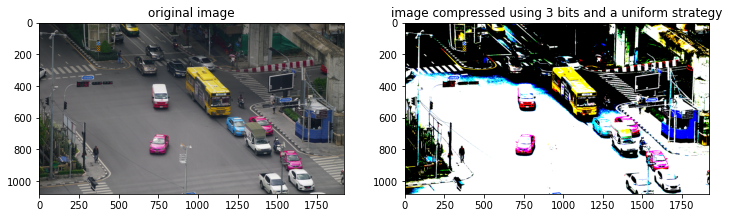

In [74]:
merged=cv2.cvtColor(merged_i.astype('float32'),cv2.COLOR_BGR2RGB)
A_rgb=cv2.cvtColor(A,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(12, 12))
fig.add_subplot(1, 2, 1).set_title("original image")
plt.imshow(A_rgb)
fig.add_subplot(1, 2, 2).set_title("image compressed using 3 bits and a uniform strategy")
plt.imshow(merged)
#fig.savefig("atefeh.png")

In [75]:
from math import log10,sqrt
def PSNR(original, compressed):

    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                    # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
print(PSNR(A,merged_i))

7.9769699999812635


NameError: name 'encoder' is not defined

# Kmean


In [1]:
from matplotlib.image import imread 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#A=imread(os.path.join('traf.bmp'))
A=cv2.imread('../traf.bmp')#bgr
(Blue,Green,Red) =cv2.split(A)


In [2]:
from sklearn.preprocessing import KBinsDiscretizer
def kmean(colors): 
    n_bins = 16
    encoder = KBinsDiscretizer(
        n_bins=n_bins, encode="ordinal", strategy="kmeans", random_state=0
    )
    compressed_img_kmeans = encoder.fit_transform(colors.reshape(-1, 1)).reshape(
        colors.shape
    )
    return compressed_img_kmeans
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    ax[0].imshow(compressed_raccoon_kmeans, cmap=plt.cm.gray)
    ax[0].axis("off")
    ax[0].set_title("Rendering of the image")
    ax[1].hist(compressed_raccoon_kmeans.ravel(), bins=256)
    ax[1].set_xlabel("Pixel value")
    ax[1].set_ylabel("Number of pixels")
    ax[1].set_title("Distribution of the pixel values")
    _ = fig.suptitle("Raccoon face compressed using 3 bits and a K-means strategy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


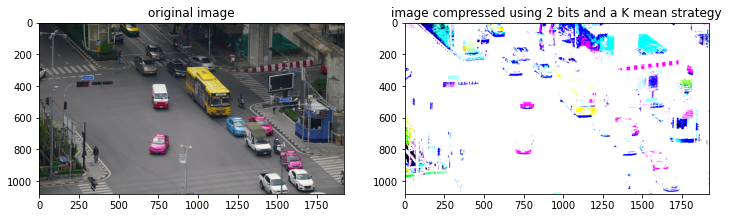

In [3]:
merged_i=cv2.merge([kmean(Blue),kmean(Green),kmean(Red)])
merged=cv2.cvtColor(merged_i.astype('float32'),cv2.COLOR_BGR2RGB)
A_rgb=cv2.cvtColor(A,cv2.COLOR_BGR2RGB)
cv2.imwrite('q4bitmin.png',merged)
fig=plt.figure(figsize=(12, 12))
fig.add_subplot(1, 2, 1).set_title("original image")
plt.imshow(A_rgb)
fig.add_subplot(1, 2, 2).set_title("image compressed using 2 bits and a K mean strategy")
plt.imshow(merged)
#fig.savefig("atefehkmea7.png")

In [4]:
from math import log10,sqrt
def PSNR(original, compressed):

    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                    # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
print(PSNR(A,merged_i))

8.435557540460204


In [64]:
import cv2
def tobin(img):
    im_gray =cv2.cvtColor(img.astype("uint8"),cv2.COLOR_BGR2GRAY)
   
    (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite('bw_img.png', im_bw)

In [65]:
tobin(merged_i)

In [82]:
m=np.where(merged==6 , merged , -1)

In [103]:
merged[9].max()

184.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


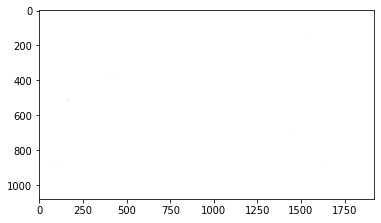

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
imgplot = plt.imshow(merged,cmap="Blues")
#plt.savefig("treebit.png")

In [6]:
h=A.shape[0]*A.shape[1]*3*4

In [7]:
h/8

3110400.0